In [1]:
from util import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [2]:
conciliation_quota  = 0.5

critical_amount     = 100

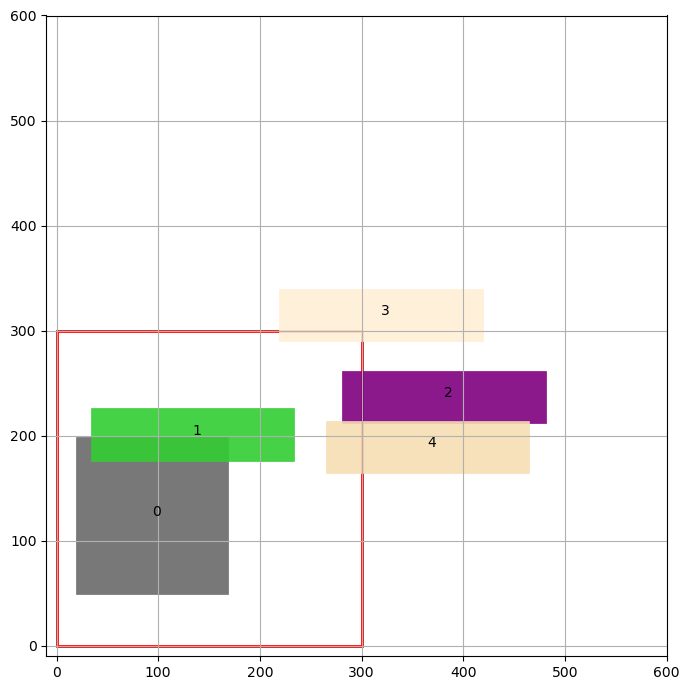

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 300,
               "height" : 300}

#participants       = generate_unconnected_participants(20, layout_zone, 30, 30, 666)

#participants        = generate_unconnected_equal_quadratic_participants(9, layout_zone, 31, 420)

participants        = generate_unconnected_wheel_participants(layout_zone, 100, 69)


a = plot_participants(layout_zone, participants, 600, 600)


In [4]:
participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

print('Participant Area: ' + str(calculate_all_participants_area(participants)))

Participant Area: 62500.0


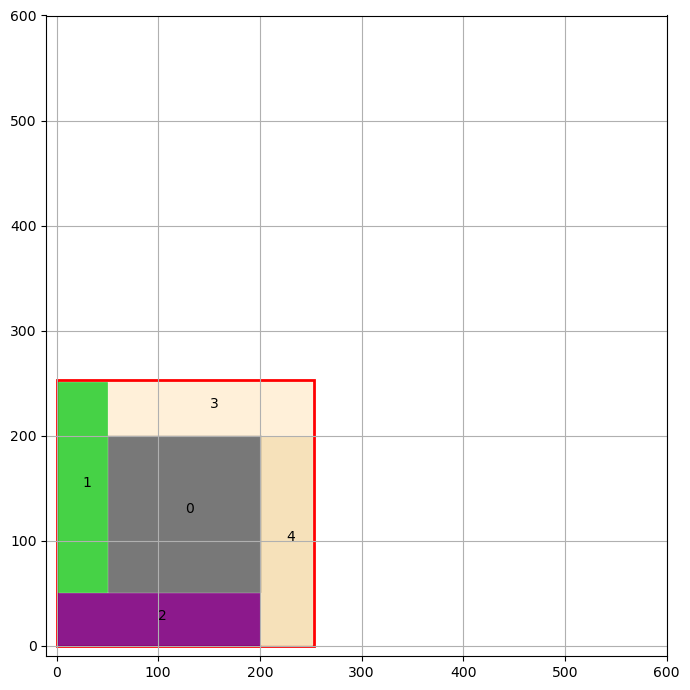

linger
linger
linger
linger
linger


In [5]:
id_list = [p['idx'] for p in (participants.values())]

for i in range(66): # maximum rounds of interaction

    participants    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 600, 600)

    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(participants['0']['interference'])
    #print(participants['0']['relaxed-connections'])
    #print(last_moves)

    if moves.count('linger') == len(participants):    

        ds = calculate_dead_space(participants, layout_zone)   

        if ds < 0.48:
            break

        layout_zone         = scale_layout_zone(layout_zone, 0.99) 

        participants        = reset_after_tightening(participants)

    for i in range(len(participants)):
        print(participants[str(i)]['last-move'])


In [6]:
#participants    	= determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

for i in range(len(participants)):
    print(participants[str(i)]['xmin'])

51
0
0
51
201


In [7]:
ds = calculate_dead_space(participants, layout_zone)

print("Dead Space: " + str(ds) + " %")

Dead Space: 0.28270192955889684 %
